<a href="https://colab.research.google.com/github/manshakhanna2004/Unified-Mentor/blob/main/Customer_Satisfaction(UnifiedMentor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Importing required libraries

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (for later steps: preprocessing, model training, evaluation)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optional: set style for plots
sns.set(style="whitegrid")

In [ ]:
# Step 2: Load the dataset
df = pd.read_csv('customer_support_tickets.csv')
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [ ]:
# Quick inspection of the dataset
print("Shape of dataset:", df.shape)        # rows and columns
print("\nColumns in dataset:\n", df.columns.tolist())  # column names
print("\nFirst 5 rows:\n")
print(df.head())

Shape of dataset: (8469, 17)

Columns in dataset:
 ['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']

First 5 rows:

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Techni

In [ ]:
# Check basic info about data types and null values
print("\nDataset Info:\n")
print(df.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   

In [ ]:
# Quick summary statistics for numerical columns
print("\nSummary Statistics:\n")
print(df.describe())


Summary Statistics:

         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


In [ ]:
# Step 3: Data Cleaning

# 1. Remove duplicate rows (if any)
df = df.drop_duplicates()

In [ ]:
# 2. Handle missing values
# For target variable (Customer Satisfaction Rating) -> drop rows with missing target
df = df.dropna(subset=["Customer Satisfaction Rating"])

In [ ]:
# For categorical/text columns -> fill missing with 'Unknown'
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

In [ ]:
# For numerical columns -> fill missing with median
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# 3. Convert date columns to datetime (if present in dataset)
date_cols = ["Date of Purchase", "First Response Time", "Time to Resolution"]
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

In [ ]:
# 4. Re-check missing values after cleaning
print("\nMissing values after cleaning:\n")
print(df.isnull().sum())


Missing values after cleaning:

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64


/tmp/ipython-input-3666683236.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Customer Satisfaction Rating", data=df, palette="viridis")


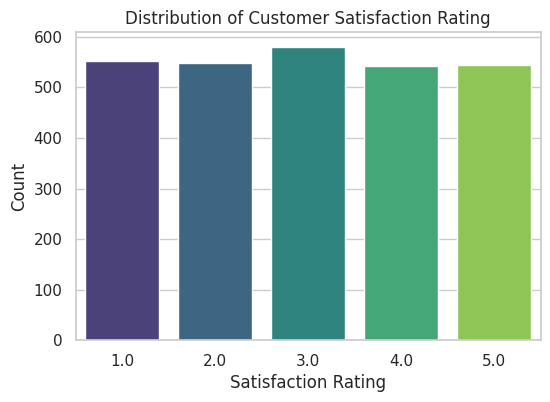

In [ ]:
# Step 4: Exploratory Data Analysis (EDA)

# 1. Distribution of the target variable (Customer Satisfaction Rating)
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Satisfaction Rating", data=df, palette="viridis")
plt.title("Distribution of Customer Satisfaction Rating")
plt.xlabel("Satisfaction Rating")
plt.ylabel("Count")
plt.show()

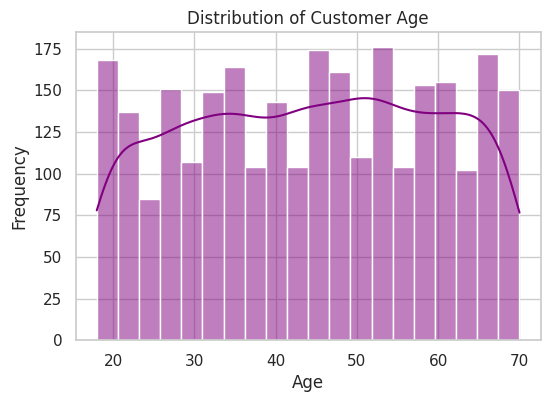

In [ ]:
# 2. Distribution of Customer Age
if "Customer Age" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["Customer Age"], bins=20, kde=True, color="purple")
    plt.title("Distribution of Customer Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

/tmp/ipython-input-2756721401.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ticket Type", data=df,


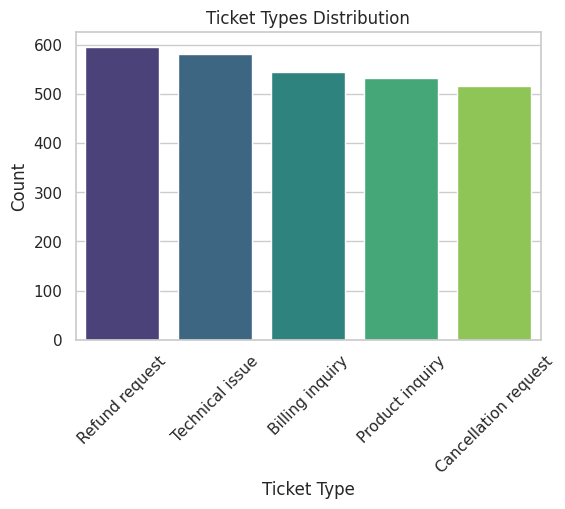

In [ ]:
# 3. Ticket Type distribution
if "Ticket Type" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Ticket Type", data=df,
                  order=df["Ticket Type"].value_counts().index, palette="viridis")
    plt.title("Ticket Types Distribution")
    plt.xlabel("Ticket Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipython-input-911951845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ticket Channel", data=df,


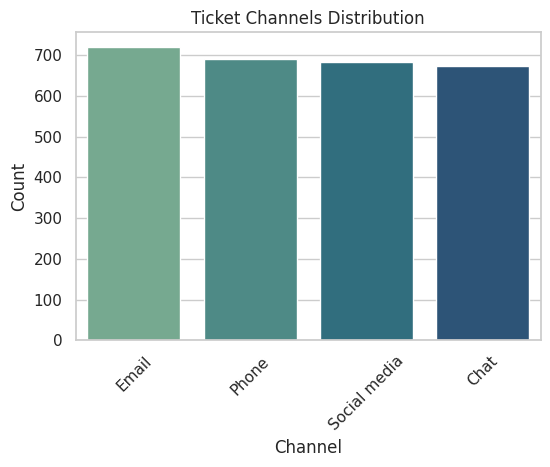

In [ ]:
# 4. Ticket Channel distribution
if "Ticket Channel" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Ticket Channel", data=df,
                  order=df["Ticket Channel"].value_counts().index, palette="crest")
    plt.title("Ticket Channels Distribution")
    plt.xlabel("Channel")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipython-input-205648794.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ticket Priority", data=df,


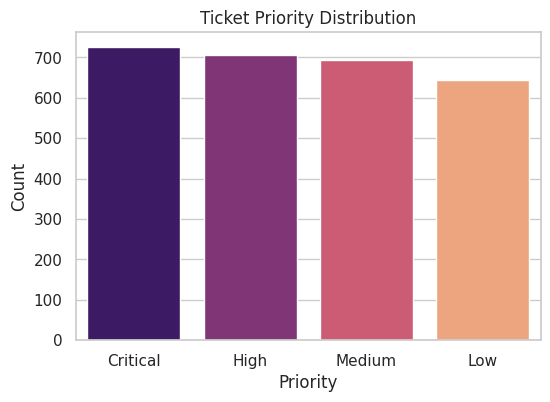

In [ ]:
# 5. Ticket Priority distribution
if "Ticket Priority" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Ticket Priority", data=df,
                  order=df["Ticket Priority"].value_counts().index, palette="magma")
    plt.title("Ticket Priority Distribution")
    plt.xlabel("Priority")
    plt.ylabel("Count")
    plt.show()

In [ ]:
# Step 5: Feature Engineering & Preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# 1. Separate features (X) and target (y)
X = df.drop("Customer Satisfaction Rating", axis=1)
y = df["Customer Satisfaction Rating"]

# 2. Identify column types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Remove text column (we'll handle separately with TF-IDF)
text_feature = "Ticket Description" if "Ticket Description" in categorical_features else None
if text_feature:
    categorical_features.remove(text_feature)

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)
print("Text feature:", text_feature)

# 3. Preprocessing setup
# -------------------------------
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# If text column exists, apply TF-IDF
if text_feature:
    text_transformer = TfidfVectorizer(max_features=500)  # limit features for efficiency

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
            ("text", text_transformer, text_feature)
        ]
    )
else:
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ]
    )

print("\nPreprocessing pipeline ready ✅")

Numeric features: ['Ticket ID', 'Customer Age']
Categorical features: ['Customer Name', 'Customer Email', 'Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel']
Text feature: Ticket Description

Preprocessing pipeline ready ✅


In [ ]:
# Step 6: Train/Test Split

from sklearn.model_selection import train_test_split

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2215, 16)
Testing set shape: (554, 16)


In [ ]:
# Step 7: Modeling - Random Forest (Baseline)

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Build pipeline: preprocessing + model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

print("✅ Model training complete")

✅ Model training complete


Accuracy: 0.1877

Classification Report:

              precision    recall  f1-score   support

         1.0       0.16      0.15      0.16       111
         2.0       0.20      0.20      0.20       110
         3.0       0.20      0.22      0.20       116
         4.0       0.20      0.20      0.20       108
         5.0       0.19      0.17      0.17       109

    accuracy                           0.19       554
   macro avg       0.19      0.19      0.19       554
weighted avg       0.19      0.19      0.19       554



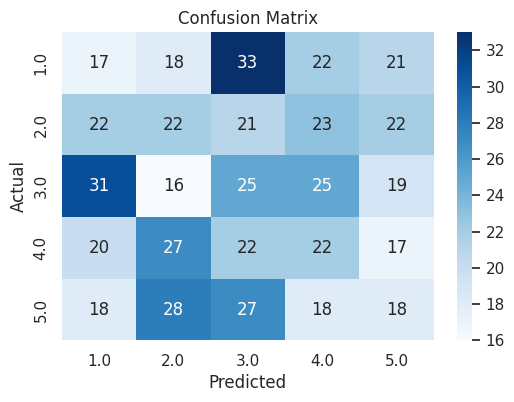

In [ ]:
# Step 8: Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on test set
y_pred = model.predict(X_test)

# 1. Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))

# 2. Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Top 15 Important Features:

                feature  importance
0             Ticket ID    0.012714
7092                the    0.012648
1          Customer Age    0.012280
6996  product_purchased    0.012004
6891              issue    0.010636
7108                 to    0.010429
7158               with    0.010346
6866             having    0.010243
6984             please    0.010172
6707                 an    0.010056
6717             assist    0.009077
6937                 my    0.008761
6893                 it    0.008600
6708                and    0.008524
7136                 ve    0.008447


/tmp/ipython-input-1735735193.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_importance.head(15), palette="crest")


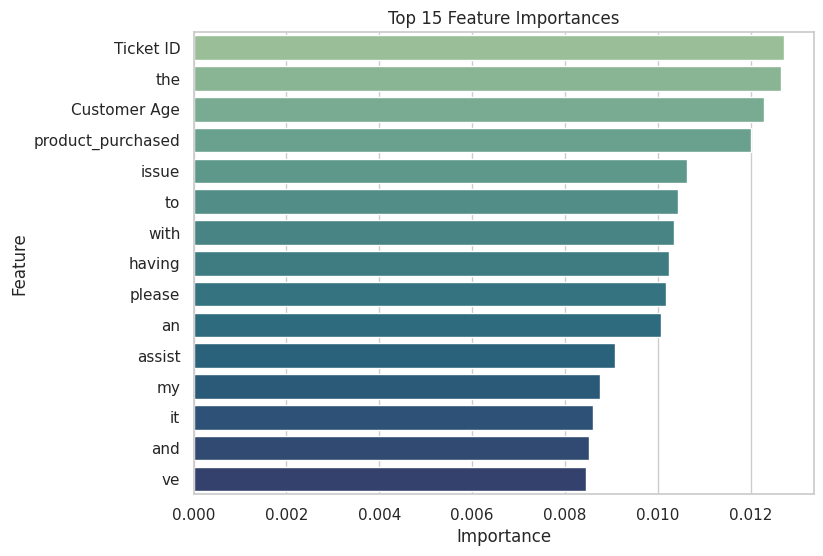

In [ ]:
# Step 9: Feature Importance (for Random Forest)

# Get the trained RandomForest model from pipeline
rf_model = model.named_steps["classifier"]

# Get feature names from the ColumnTransformer
feature_names = []

# Numeric features
feature_names.extend(numeric_features)

# Categorical features (expanded after one-hot encoding)
cat_encoder = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
feature_names.extend(cat_feature_names)

# Text features (from TF-IDF)
if text_feature:
    text_vectorizer = model.named_steps["preprocessor"].named_transformers_["text"]
    text_feature_names = text_vectorizer.get_feature_names_out()
    feature_names.extend(text_feature_names)

# Match feature importances with names
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Show top 15 important features
print("\nTop 15 Important Features:\n")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x="importance", y="feature", data=feature_importance.head(15), palette="crest")
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
